# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('previsao_de_renda.csv')

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [147]:
df_tarefa1 = df.select_dtypes(exclude=['int','float'])
df_tarefa1.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


In [148]:
def plotbarDf (data,x):
    crossData = pd.crosstab(data['data_ref'],data[x])
    crossData = crossData.div(crossData.sum(axis=1),axis=0)
    crossData.plot.bar(stacked =True,rot=70,figsize=(12, 6),title=x);
    plt.legend(
        title=x,
        loc="upper left", 
        bbox_to_anchor=(1, 1) 
    )
    plt.show()


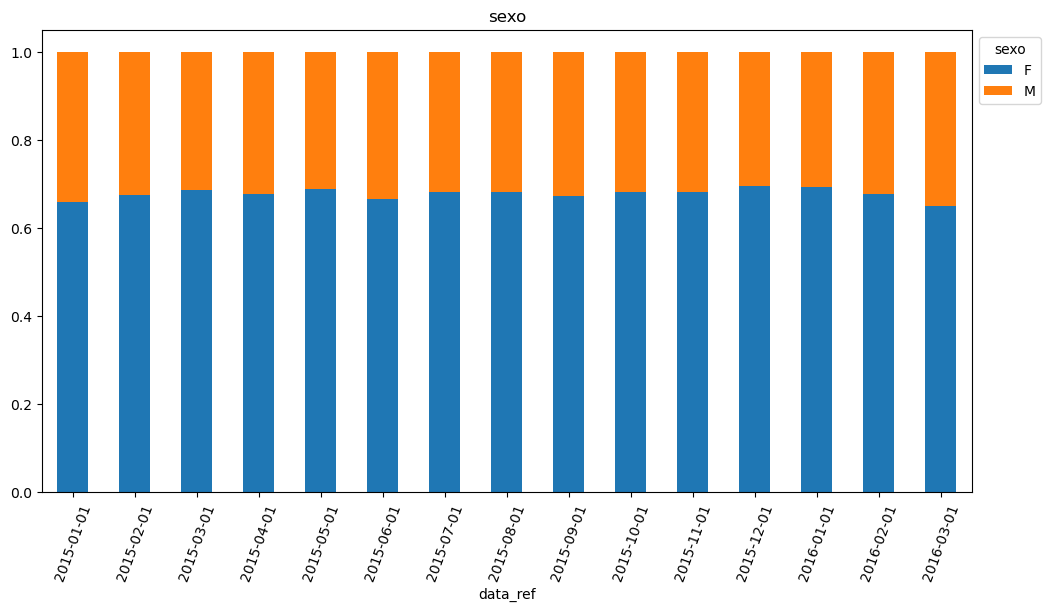

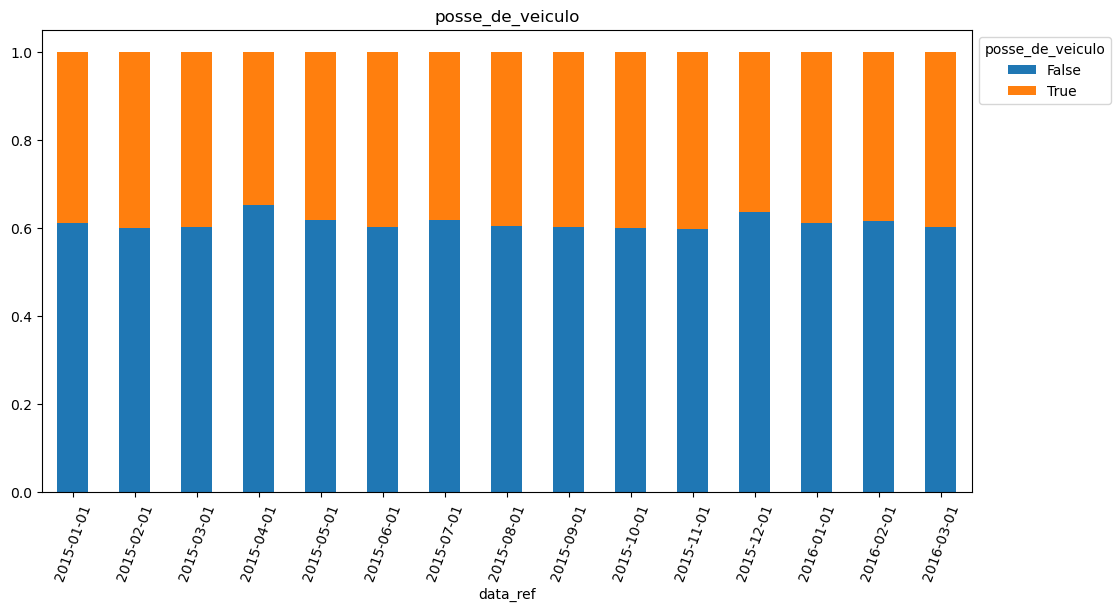

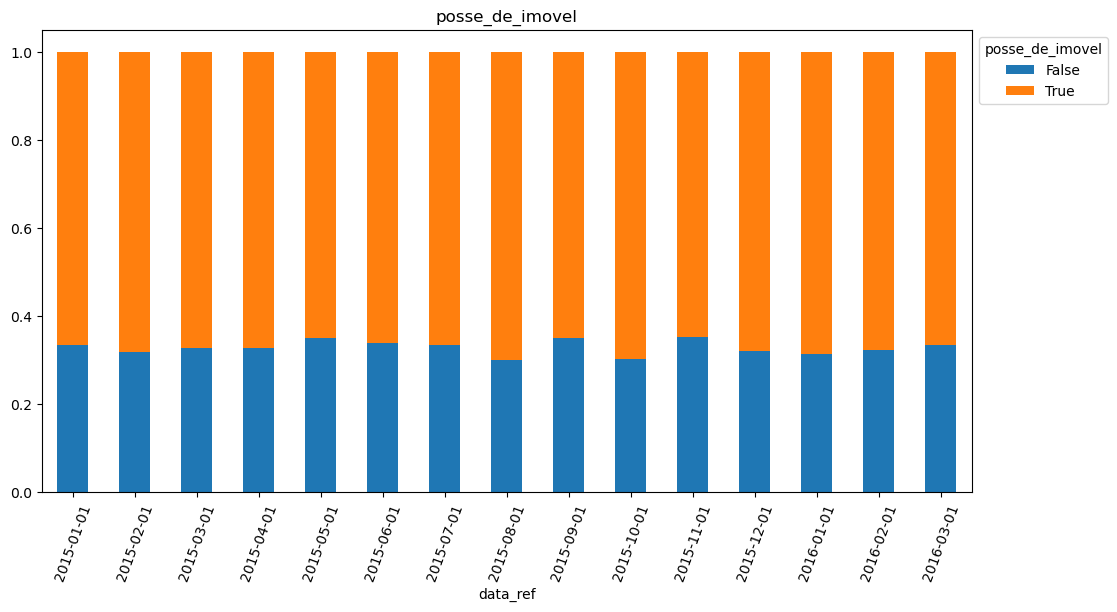

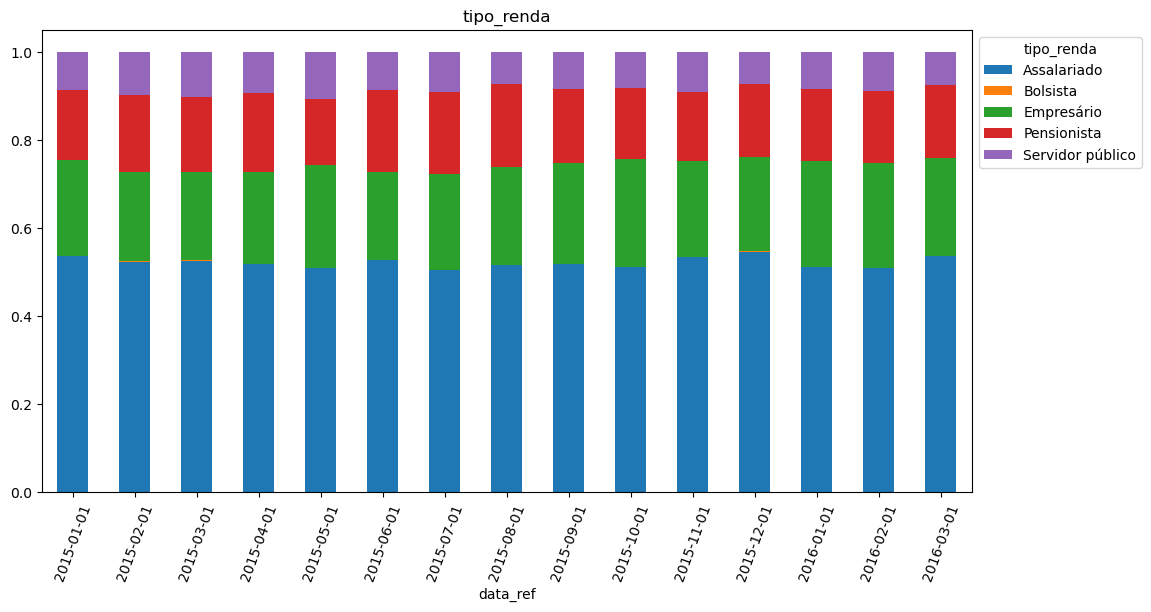

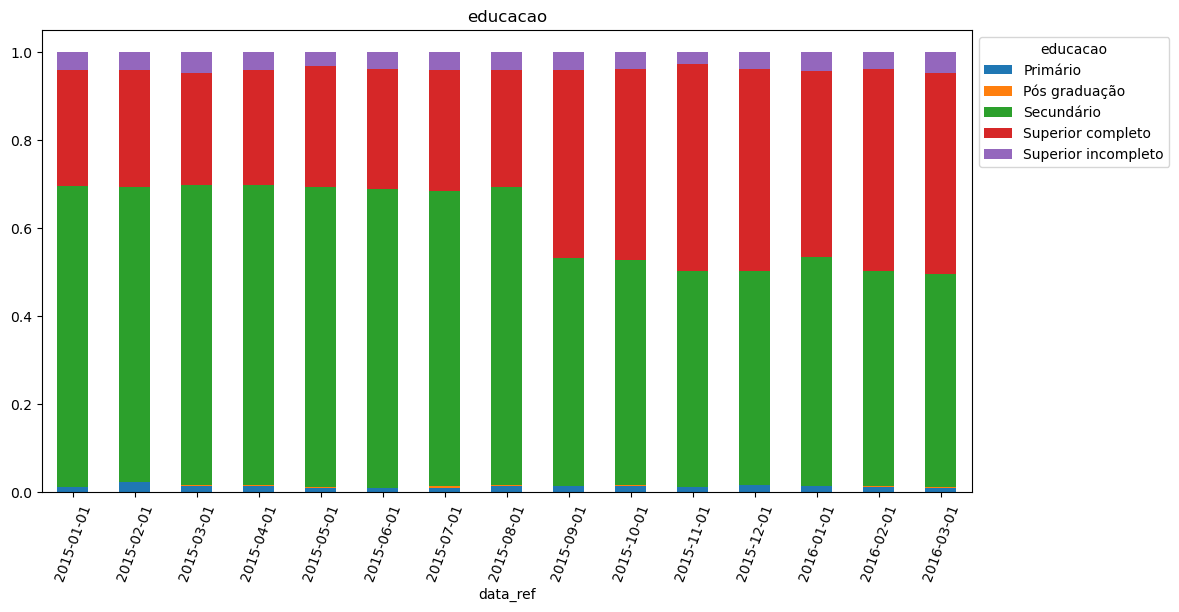

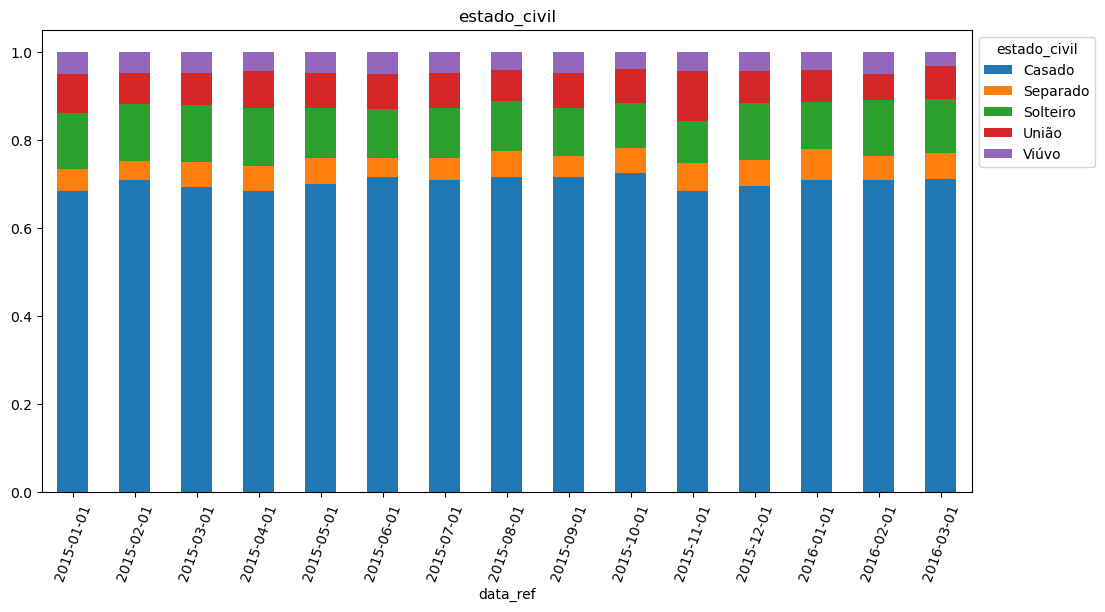

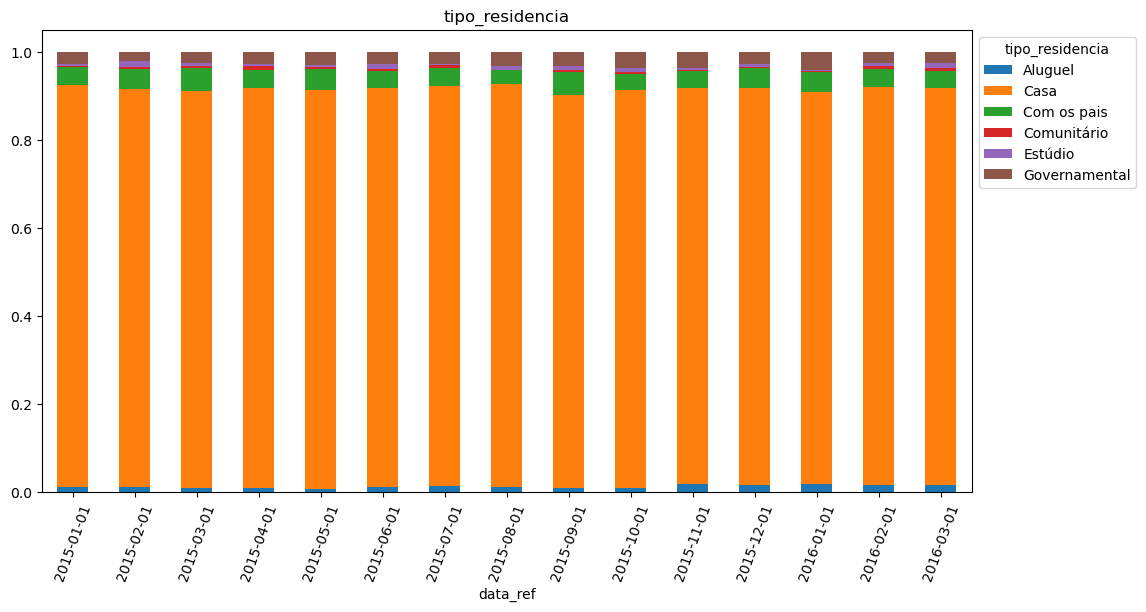

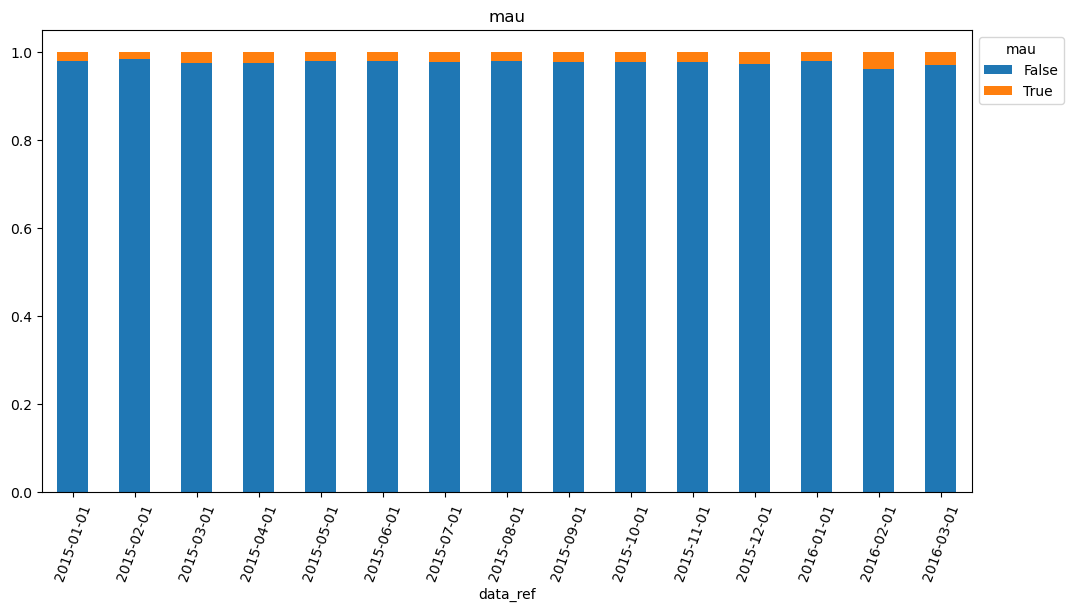

In [149]:
df_tarefa1.drop(columns=['data_ref']).columns.map(lambda x:plotbarDf(df_tarefa1,x));

RESPOSTA:
-
Nos dados da variável 'educacao' é possivel ver uma variação dos indicadores de SUPERIOR COMPLETO e SECUNDÁRIO a partir do mês 09, seria válido fazer uma análise mais detalhada do motivo dessa variação.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

na página do exercício o Tutor (Ursula Fernanda Martins EBAC) informa que esse enunciado está incorreto, o correto é avaliar as variáveis QUANTITATIVAS

In [150]:
df_tarefa2 = df.select_dtypes(include=['int','float']).drop(columns=['Unnamed: 0','index'])
df_tarefa2['data_ref'] = df.data_ref
df_tarefa2 = df_tarefa2.groupby(['data_ref']).mean()
df_tarefa2.head()


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,
2015-01-01,0.431,43.794,7.677761,2.201,4606.01071
2015-02-01,0.438,44.109,7.688772,2.217,4672.76708
2015-03-01,0.408,43.657,7.826948,2.173,4616.11109
2015-04-01,0.428,43.534,7.750912,2.198,4578.24089
2015-05-01,0.394,43.935,8.087878,2.174,4631.34791


In [151]:
def plotBar(data,x):
    data[x].plot.bar(rot=70,figsize=(12, 6),title=x)
    plt.show()

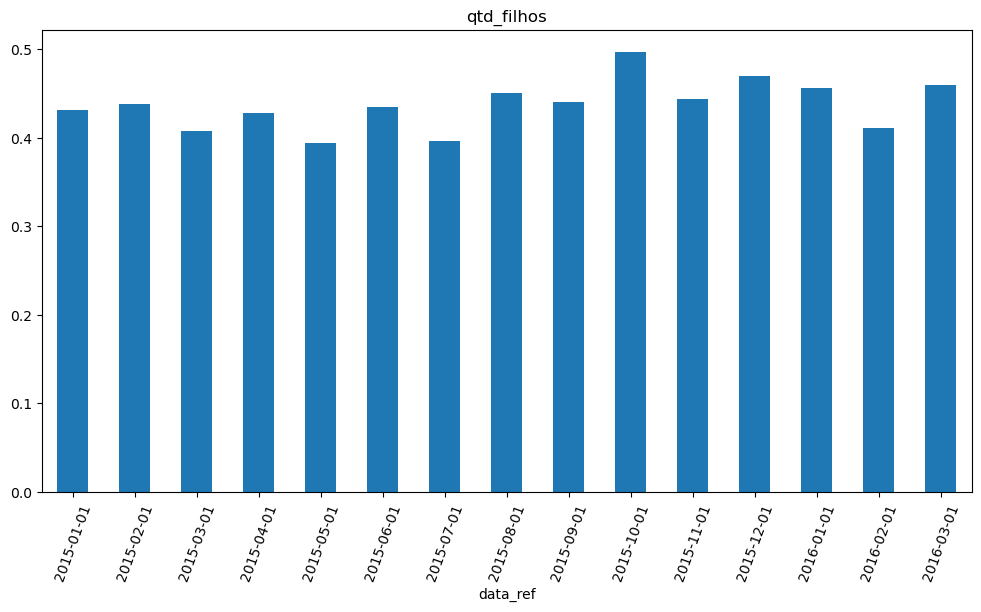

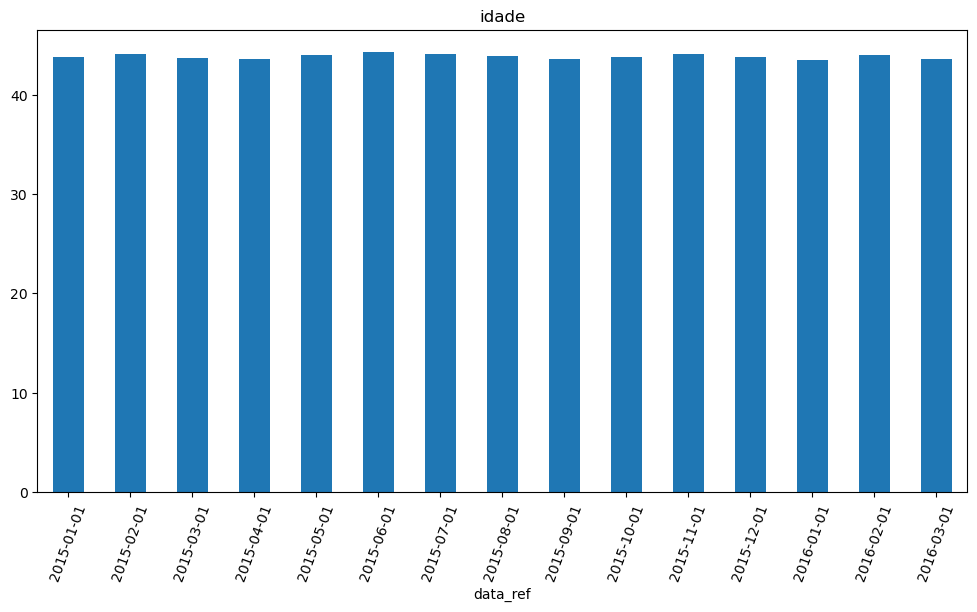

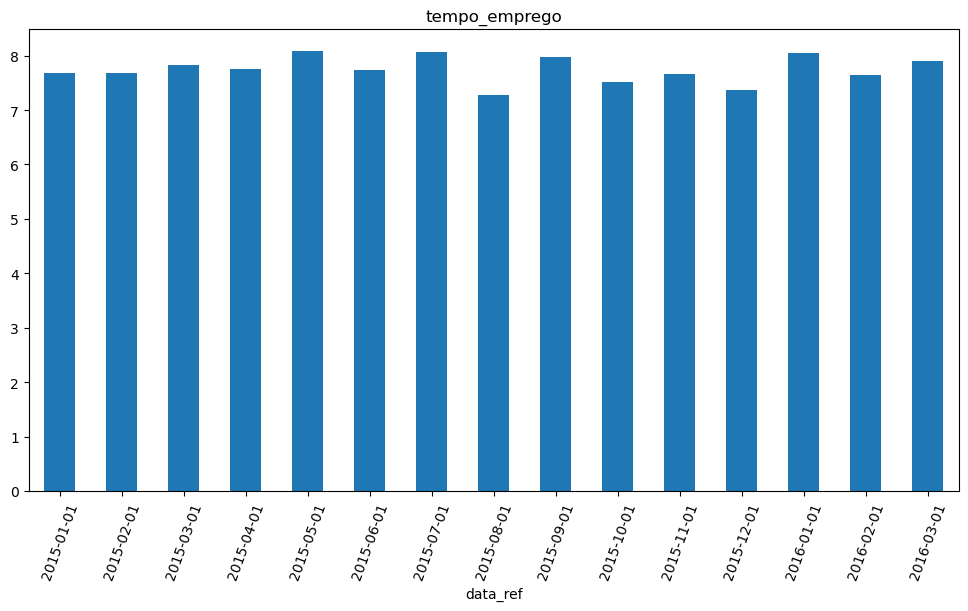

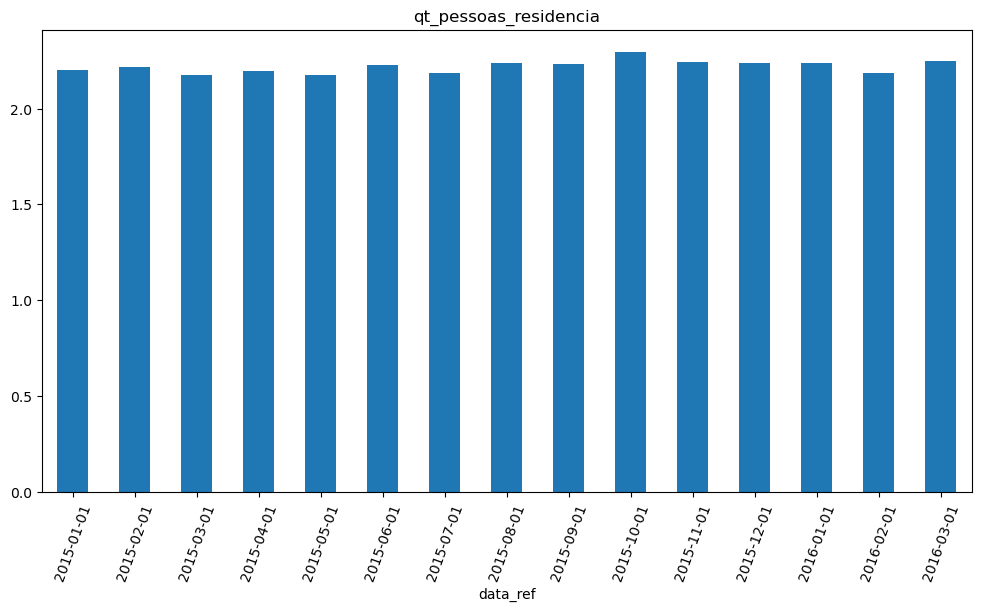

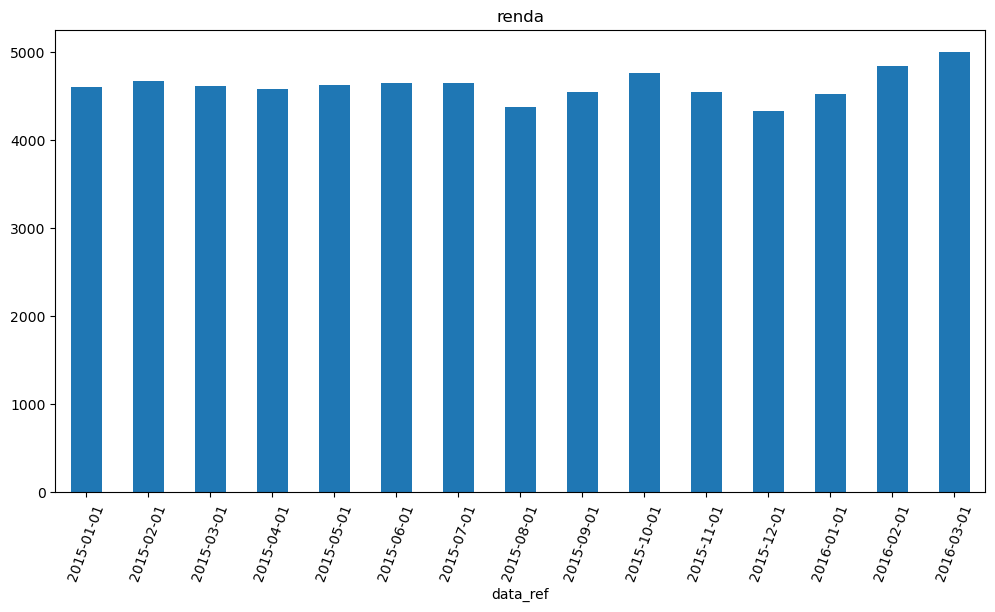

In [152]:
df_tarefa2.columns.map(lambda x:plotBar(df_tarefa2,x));

RESPOSTA:
-
sem alterações significativas ao decorrer do tempo, os gráficos permanecem estáveis.
SIM, seria possível utilizar essas variáveis.